In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# 設定圖片的標準尺寸和存放的路徑
standard_height = 300; standard_width = 300
standard_aspect_ratio = standard_width / standard_height
PATH = "C:/Users/Mr-Fish/Desktop/FIDS30/apples/"

In [3]:
def zoom_adjust(img, axis):
    # 縮放調整圖片的副程式：等比例將圖片寬、高其中一邊調成標準大小
    # [參數] img:原始圖片，型態為ndarray ,  axis:用來選擇做為基準的邊(軸)
    #     axis == 0 將img.shpae[0]，即圖片的高調整成 standard_height
    #     axis == 1 將img.shpae[1]，即圖片的寬調整成 standard_width
    #     axis 若為 0,1以外的值就直接將圖片resize成標準尺寸
    if axis == 0:
        zoom_ratio = standard_height / img.shape[0]
        if zoom_ratio < 1:
            img = cv2.resize(img, (int(img.shape[1]*zoom_ratio),standard_height), interpolation=cv2.INTER_AREA)
        elif zoom_ratio > 1:
            img = cv2.resize(img, (int(img.shape[1]*zoom_ratio),standard_height), interpolation=cv2.INTER_CUBIC)
    elif axis == 1:
        zoom_ratio = standard_width / img.shape[1]
        if zoom_ratio < 1:
            img = cv2.resize(img, (standard_width,int(img.shape[0]*zoom_ratio)), interpolation=cv2.INTER_AREA)
        elif zoom_ratio > 1:
            img = cv2.resize(img, (standard_width,int(img.shape[0]*zoom_ratio)), interpolation=cv2.INTER_CUBIC)
    else:
        if(standard_height < img.shape[0]):
            img = cv2.resize(img, (standard_width,standard_height), interpolation=cv2.INTER_AREA)
        else:
            img = cv2.resize(img, (standard_width,standard_height), interpolation=cv2.INTER_CUBIC)
        img = img[:,:,0:3]
    return img

In [4]:
def padding(img, axis):
    # 將調整過的圖片擴展成標準size(針對不足的區塊全部填充 0)
    # [參數] img:調整後的圖片，型態為ndarray ,  axis:小於標準寬高的邊(軸)
    # 先創建一個標準size的空圖片 A，再將img複製到 A的中間
    A = np.zeros((standard_height,standard_width,3), dtype=np.uint8)
    if axis == 0:
        bottom = int((standard_height - img.shape[0]) / 2)
        top = bottom + img.shape[0]
        A[bottom:top,:,:] = img[:,:,0:3]
    elif axis == 1:
        left = int((standard_width - img.shape[1]) / 2)
        right = left + img.shape[1]
        A[:,left:right,:] = img[:,:,0:3]
    return A

In [5]:
def cutting(img, axis):
    # 等比例將圖片寬、高中較短的邊調成標準大小，再切除長邊多餘的部分
    # [參數] img:原始圖片，型態為ndarray ,  axis:用來選擇作為基準的軸(短邊)
    img = zoom_adjust(img, axis)
    if axis == 0:
        left = int((img.shape[1] - standard_width) / 2)
        right = left + standard_width
        img = img[:,left:right,0:3]
    elif axis == 1:
        bottom = int((img.shape[0] - standard_height) / 2)
        top = bottom + standard_height
        img = img[bottom:top,:,0:3]
    return img

In [6]:
def size_adjust(img, method="resize"):
    # 將圖片調整成標準size，有三種方法，預設為resize
    #     method == "resize": 直接透過cv2模組resize成標準尺寸
    #     method == "padding": 將圖片等比縮放至長邊等於標準大小，再填滿剩餘區域
    #     method == "cutting": 將圖片等比縮放至短邊等於標準大小，再將多餘區域切除
    if method == "resize":
        img = zoom_adjust(img, 2)
    elif method == "padding":
        aspect_ratio = img.shape[1] / img.shape[0]
        if aspect_ratio < standard_aspect_ratio:
            img = zoom_adjust(img, 0)
            img = padding(img, 1)
        elif aspect_ratio > standard_aspect_ratio:
            img = zoom_adjust(img, 1)
            img = padding(img, 0)
        else:
            img = zoom_adjust(img, 2)
    elif method == "cutting":
        aspect_ratio = img.shape[1] / img.shape[0]
        if aspect_ratio < standard_aspect_ratio:
            img = cutting(img, 1)
        elif aspect_ratio > standard_aspect_ratio:
            img = cutting(img, 0)
        else:
            img = zoom_adjust(img, 2)
    else: print("Error: Argument 'method' not allowed")
    return img

In [7]:
original = []
Apple1 = []
Apple2 = []
Apple3 = []
for file in os.listdir(PATH):
    img = mpimg.imread(PATH + file)
    original.append(img)
    Apple1.append(size_adjust(img, method="resize"))
    Apple2.append(size_adjust(img, method="padding"))
    Apple3.append(size_adjust(img, method="cutting"))

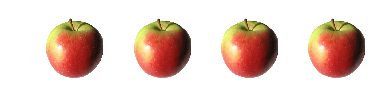

(1800, 1800, 3) (300, 300, 3) (300, 300, 3) (300, 300, 3)


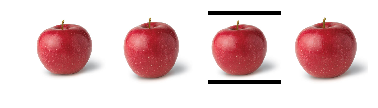

(300, 333, 3) (300, 300, 3) (300, 300, 3) (300, 300, 3)


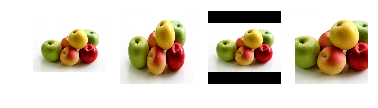

(253, 380, 3) (300, 300, 3) (300, 300, 3) (300, 300, 3)


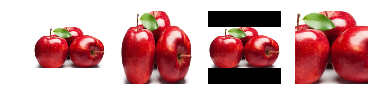

(534, 950, 3) (300, 300, 3) (300, 300, 3) (300, 300, 3)


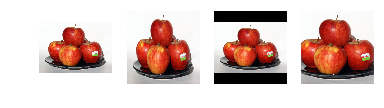

(2412, 3436, 3) (300, 300, 3) (300, 300, 3) (300, 300, 3)


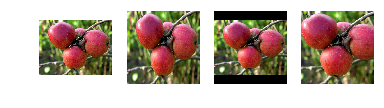

(1200, 1600, 3) (300, 300, 3) (300, 300, 3) (300, 300, 3)


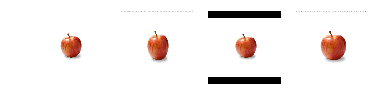

(314, 384, 4) (300, 300, 3) (300, 300, 3) (300, 300, 3)


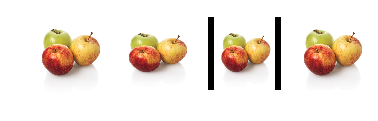

(357, 300, 3) (300, 300, 3) (300, 300, 3) (300, 300, 3)


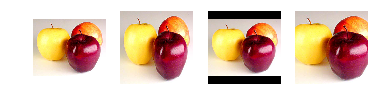

(275, 350, 3) (300, 300, 3) (300, 300, 3) (300, 300, 3)


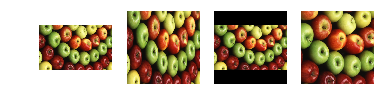

(1600, 2560, 3) (300, 300, 3) (300, 300, 3) (300, 300, 3)


In [8]:
for i in range(20,30):
    plt.figure()
    plt.subplot(1,4,1)
    plt.imshow(original[i])
    plt.axis('off')
    plt.subplot(1,4,2)
    plt.imshow(Apple1[i])
    plt.axis('off')
    plt.subplot(1,4,3)
    plt.imshow(Apple2[i])
    plt.axis('off')
    plt.subplot(1,4,4)
    plt.imshow(Apple3[i])
    plt.axis('off')
    plt.show()
    print(original[i].shape, Apple1[i].shape, Apple2[i].shape, Apple3[i].shape)

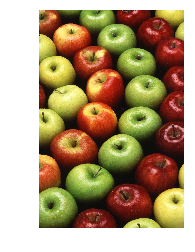

(2700, 1800, 3)


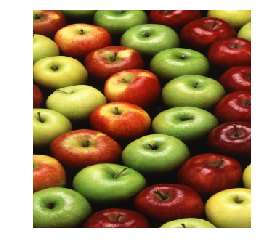

(300, 300, 3)


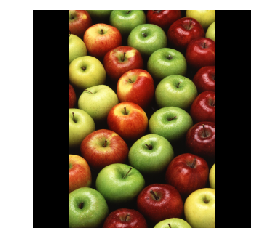

(300, 300, 3)


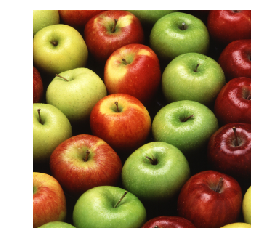

(300, 300, 3)


In [9]:
plt.imshow(original[0])
plt.axis('off')
plt.show()
print(original[0].shape)

plt.imshow(Apple1[0])
plt.axis('off')
plt.show()
print(Apple1[0].shape)

plt.imshow(Apple2[0])
plt.axis('off')
plt.show()
print(Apple2[0].shape)

plt.imshow(Apple3[0])
plt.axis('off')
plt.show()
print(Apple3[0].shape)